<img src="kit_logo.jpg" width="200" height="200" align="right"/>

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### SS 2020

# Multivariate Verfahren
## Übung 5

### Aufgabe 5

Laden Sie aus Ilias den Datensatz *`staedte.csv`* Dieser enthält die Daten Ihres Rankings.
Führen Sie eine nicht-metrische Multidimensionale Skalierung durch.

#### Datenvorbereitung

- Daten einlesen:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./staedte.csv",sep=',',header=None)
U = pd.DataFrame.to_numpy(df)
U # n-by-n dissimilarity matrix U

array([[ 0, 45, 17, 44, 42, 32, 31, 27, 25, 11],
       [45,  0, 34, 14, 12, 21, 35, 37, 25, 39],
       [17, 34,  0, 30, 18,  5,  4, 22,  9,  7],
       [44, 14, 30,  0,  1, 15, 24, 43, 38, 41],
       [42, 12, 18,  1,  0,  2, 13, 40, 28, 33],
       [32, 21,  5, 15,  2,  0, 10, 29, 16, 19],
       [31, 35,  4, 24, 13, 10,  0, 36, 23, 20],
       [27, 37, 22, 43, 40, 29, 36,  0,  3,  8],
       [25, 25,  9, 38, 28, 16, 23,  3,  0,  6],
       [11, 39,  7, 41, 33, 19, 20,  8,  6,  0]], dtype=int64)

*U : Unähnlichkeitsdaten*

*$u_{ij}=1$ für ähnlichstes Paar $(i,j)$*,

*$u_{ij}=45$ für unähnlichstes Paar $(i,j)$*.

#### Nicht-Metrische Multidimensionale Skalierung

- Define a function *cmdscale* for classical MDS to get Startconfiguration for non-metrical MDS

In [2]:
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Decomposition                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

- Berechnung der Konfiguration $Y_0$ als Ausgangskonfiguration für non-classical MDS 

In [3]:
init_D,_ = cmdscale(U)
Y_0 = init_D[:,:2]
Y_0

array([[-20.50336672,   6.61718153],
       [ 18.87044902, -15.67610058],
       [ -6.16203912,   7.711578  ],
       [ 23.49977549,   1.80337848],
       [ 18.61759952,   3.48589364],
       [  6.74067193,   2.52497343],
       [  3.40726491,  14.87406087],
       [-17.67561534, -14.03755061],
       [ -9.52744842,  -9.07018123],
       [-17.26729128,   1.76676646]])

- Non-metric MDS Model festlegen und anpassen

In [4]:
# non-metric Multidimensional scaling with Pre-computed dissimilarities U and the Initialized configuration of points Y_0
from sklearn.manifold import MDS
nmds = MDS(n_components=2, metric=False,dissimilarity ='precomputed')
#nmds.fit(U)
nmds.fit(U,init=Y_0)

C:\Users\Zhu\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\mds.py:243: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  % n_init)


MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=False,
  n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

- Ausgabe Rohstress 

In [5]:
raw_stress=nmds.stress_
raw_stress

0.010452887904892658

- Ausgabe Konfiguration $Y$ 

*Konfiguration: Die Menge der Objekte und ihrer relativen Positionen zueinander*

In [6]:
Y=nmds.embedding_ # Y:  a configuration of n points (rows) in 2 dimensions (columns)
print('Konfiguration Y: ','\n', Y)

Konfiguration Y:  
 [[-0.62607974  0.27076095]
 [ 0.46735367 -0.40773996]
 [-0.11648451  0.14763533]
 [ 0.64124042  0.0412294 ]
 [ 0.44783739  0.07829862]
 [ 0.1759683   0.04294124]
 [ 0.08539866  0.35026765]
 [-0.44287095 -0.33690715]
 [-0.22628339 -0.23002588]
 [-0.42113826  0.04280033]]


- Plot der Konfiguration im Wahrnehmungsraum

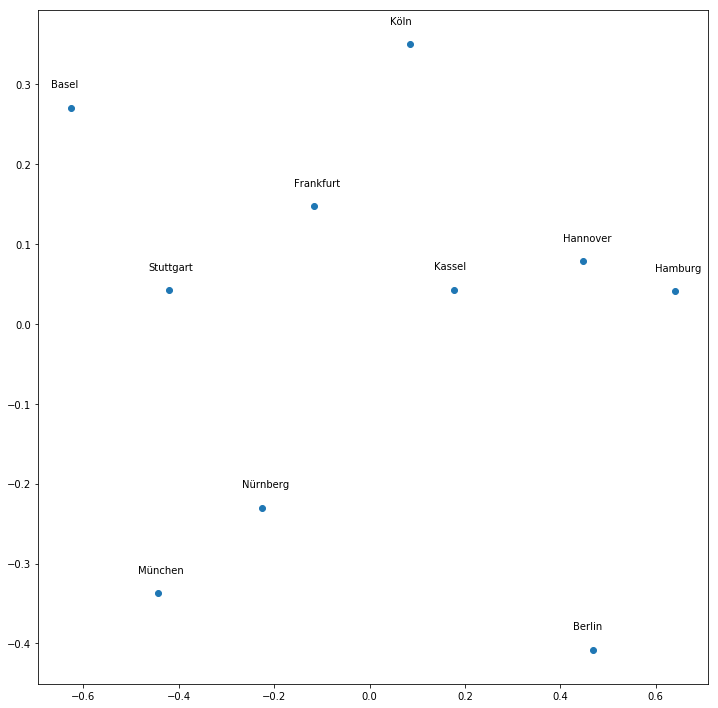

In [7]:
cities = ['Basel','Berlin','Frankfurt','Hamburg','Hannover','Kassel','Köln','München','Nürnberg','Stuttgart']
coords = nmds.embedding_

fig = plt.figure(figsize=(12,12))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()

### Exkurs (customized Class MDSNew)
####  mit Disparitäten und $STRESS_1$ für quantitativen Unähnlichkeiten

In [8]:
def _smacof_single(dissimilarities, metric=True, n_components=2, init=None,
                   max_iter=300, verbose=0, eps=1e-3, random_state=None,
                   normalize=False):
    """Computes multidimensional scaling using SMACOF algorithm
    Parameters
    ----------
    dissimilarities : ndarray, shape (n_samples, n_samples)
        Pairwise dissimilarities between the points. Must be symmetric.
    metric : boolean, optional, default: True
        Compute metric or nonmetric SMACOF algorithm.
    n_components : int, optional, default: 2
        Number of dimensions in which to immerse the dissimilarities. If an
        ``init`` array is provided, this option is overridden and the shape of
        ``init`` is used to determine the dimensionality of the embedding
        space.
    init : ndarray, shape (n_samples, n_components), optional, default: None
        Starting configuration of the embedding to initialize the algorithm. By
        default, the algorithm is initialized with a randomly chosen array.
    max_iter : int, optional, default: 300
        Maximum number of iterations of the SMACOF algorithm for a single run.
    verbose : int, optional, default: 0
        Level of verbosity.
    eps : float, optional, default: 1e-3
        Relative tolerance with respect to stress at which to declare
        convergence.
    random_state : int, RandomState instance or None, optional, default: None
        The generator used to initialize the centers.  If int, random_state is
        the seed used by the random number generator; If RandomState instance,
        random_state is the random number generator; If None, the random number
        generator is the RandomState instance used by `np.random`.
    normalize : boolean, optional, default: False
        Whether use and return normed stress value (Stress_1) instead of raw
        stress calculated by default.
    Returns
    -------
    X : ndarray, shape (n_samples, n_components)
        Coordinates of the points in a ``n_components``-space.
    stress : float
        The value of the stress. By default, sum of squared distance
        of the disparities and the distances for all constrained points.
        If normalize is set to True, returns Stress-1 (according to
        Kruskal (1964, p. 3) value 0 indicates "perfect" fit, 0.025
        excellent, 0.05 good, 0.1 fair, and 0.2 poor).
    disp : array-like, shape (n_samples,n_samples)
        The current values of the disparities.
    distance : array-like, shape (n_samples*n_samples)
        The current values of the euclidean distances.
    it : int
        The current number of iterations corresponding to the stress.
    """
    dissimilarities = check_symmetric(dissimilarities, raise_exception=True)

    n_samples = dissimilarities.shape[0]
    random_state = check_random_state(random_state)

    sim_flat = ((1 - np.tri(n_samples)) * dissimilarities).ravel()
    sim_flat_w = sim_flat[sim_flat != 0]
    #sigsq = np.mean(dissimilarities**2)/(2*n_components)
    #np.sqrt(sigsq)
    if init is None:
        # Randomly choose initial configuration
        X = random_state.rand(n_samples , n_components)
        X = X.reshape((n_samples, n_components))
        
    else:
        # overrides the parameter p
        n_components = init.shape[1]
        if n_samples != init.shape[0]:
            raise ValueError("init matrix should be of shape (%d, %d)" %
                             (n_samples, n_components))
        X = init

    old_stress = None
    ir = IsotonicRegression()
    for it in range(max_iter):
        # Compute distance and monotonic regression
        dis = euclidean_distances(X)

        if metric:
            disparities = dissimilarities
        else:
            dis_flat = dis.ravel()
            # dissimilarities with 0 are considered as missing values
            dis_flat_w = dis_flat[sim_flat != 0]

            # Compute the disparities using a monotonic regression
            disparities_flat = ir.fit_transform(sim_flat_w, dis_flat_w)
            disparities = dis_flat.copy()
            
            disparities[sim_flat != 0] = disparities_flat
            disparities = disparities.reshape((n_samples, n_samples))
            disparities *= np.sqrt((n_samples * (n_samples - 1) / 2) /
                                   (disparities ** 2).sum())
        # Deliver the actual disparities
        disp=disparities.ravel()
            
        # Compute Raw-Stress
        stress = ((dis.ravel() - disparities.ravel()) ** 2).sum() / 2
        
        # Deliver distance matrix for Stress_1    
        distance = dis.ravel()
        
        # Update X using the Guttman transform
        dis[dis == 0] = 1e-5
        ratio = disparities / dis
        B = - ratio
        B[np.arange(len(B)), np.arange(len(B))] += ratio.sum(axis=1)
        X = 1. / n_samples * np.dot(B, X)

        dis = np.sqrt((X ** 2).sum(axis=1)).sum()
        if verbose >= 2:
            print('it: %d, stress %s' % (it, stress))
        if old_stress is not None:
            if(old_stress - stress / dis) < eps:
                if verbose:
                    print('breaking at iteration %d with stress %s' % (it,
                                                                       stress))
                break
        old_stress = stress / dis

    return X, stress, disp, distance, it + 1

In [9]:
def smacof(dissimilarities, metric=True, n_components=2, init=None, n_init=8,
           n_jobs=1, max_iter=300, verbose=0, eps=1e-3, random_state=None,
           return_n_iter=False, normalize=False):
    """Computes multidimensional scaling using the SMACOF algorithm.
    The SMACOF (Scaling by MAjorizing a COmplicated Function) algorithm is a
    multidimensional scaling algorithm which minimizes an objective function
    (the *stress*) using a majorization technique. Stress majorization, also
    known as the Guttman Transform, guarantees a monotone convergence of
    stress, and is more powerful than traditional techniques such as gradient
    descent.
    The SMACOF algorithm for metric MDS can summarized by the following steps:
    1. Set an initial start configuration, randomly or not.
    2. Compute the stress
    3. Compute the Guttman Transform
    4. Iterate 2 and 3 until convergence.
    The nonmetric algorithm adds a monotonic regression step before computing
    the stress.
    Parameters
    ----------
    dissimilarities : ndarray, shape (n_samples, n_samples)
        Pairwise dissimilarities between the points. Must be symmetric.
    metric : boolean, optional, default: True
        Compute metric or nonmetric SMACOF algorithm.
    n_components : int, optional, default: 2
        Number of dimensions in which to immerse the dissimilarities. If an
        ``init`` array is provided, this option is overridden and the shape of
        ``init`` is used to determine the dimensionality of the embedding
        space.
    init : ndarray, shape (n_samples, n_components), optional, default: None
        Starting configuration of the embedding to initialize the algorithm. By
        default, the algorithm is initialized with a randomly chosen array.
    n_init : int, optional, default: 8
        Number of times the SMACOF algorithm will be run with different
        initializations. The final results will be the best output of the runs,
        determined by the run with the smallest final stress. If ``init`` is
        provided, this option is overridden and a single run is performed.
    n_jobs : int, optional, default: 1
        The number of jobs to use for the computation. If multiple
        initializations are used (``n_init``), each run of the algorithm is
        computed in parallel.
        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For ``n_jobs`` below -1,
        (``n_cpus + 1 + n_jobs``) are used. Thus for ``n_jobs = -2``, all CPUs
        but one are used.
    max_iter : int, optional, default: 300
        Maximum number of iterations of the SMACOF algorithm for a single run.
    verbose : int, optional, default: 0
        Level of verbosity.
    eps : float, optional, default: 1e-3
        Relative tolerance with respect to stress at which to declare
        convergence.
    random_state : int, RandomState instance or None, optional, default: None
        The generator used to initialize the centers.  If int, random_state is
        the seed used by the random number generator; If RandomState instance,
        random_state is the random number generator; If None, the random number
        generator is the RandomState instance used by `np.random`.
    return_n_iter : bool, optional, default: False
        Whether or not to return the number of iterations.
    normalize : boolean, optional, default: False
        Whether use and return normed stress value (Stress-1) instead of raw
        stress calculated by default.
    Returns
    -------
    best_pos : ndarray, shape (n_samples, n_components)
        Coordinates of the points in a ``n_components``-space.
    best_stress : float
        The final value of the stress. By default, sum of squared distance
        of the disparities and the distances for all constrained points.
        If normalize is set to True, returns Stress_1 (according to
        Kruskal (1964, p. 3) value 0 indicates "perfect" fit, 0.025
        excellent, 0.05 good, 0.1 fair, and 0.2 poor).
    best_disp : array-like, shape (n_samples,n_samples)
        The final values of the disparities.
    best_dism : array-like, shape (n_samples,n_samples)
        The final values of the euclidean distances.
    n_iter : int
        The number of iterations corresponding to the best stress. Returned
        only if ``return_n_iter`` is set to ``True``.
    Notes
    -----
    "Modern Multidimensional Scaling - Theory and Applications" Borg, I.;
    Groenen P. Springer Series in Statistics (1997)
    "Nonmetric multidimensional scaling: a numerical method" Kruskal, J.
    Psychometrika, 29 (1964)
    "Multidimensional scaling by optimizing goodness of fit to a nonmetric
    hypothesis" Kruskal, J. Psychometrika, 29, (1964)
    """

    dissimilarities = check_array(dissimilarities)
    n_samples = dissimilarities.shape[0]
    random_state = check_random_state(random_state)

    if hasattr(init, '__array__'):
        init = np.asarray(init).copy()
        if not n_init == 1:
            warnings.warn(
                'Explicit initial positions passed: '
                'performing only one init of the MDS instead of %d'
                % n_init)
            n_init = 1

    best_pos, best_stress = None, None

    if n_jobs == 1:
        for it in range(n_init):
            pos, stress, disparities,dis,n_iter_ = _smacof_single(
                dissimilarities, metric=metric,
                n_components=n_components, init=init,
                max_iter=max_iter, verbose=verbose,
                eps=eps, random_state=random_state,
                normalize=normalize)
            if best_stress is None or stress < best_stress:
                best_stress = stress
                best_disp=disparities.reshape((n_samples, n_samples))
                best_pos = pos.copy()
                best_iter = n_iter_
                best_dis=dis

    else:
        seeds = random_state.randint(np.iinfo(np.int32).max, size=n_init)
        results = Parallel(n_jobs=n_jobs, verbose=max(verbose - 1, 0))(
            delayed(_smacof_single)(
                dissimilarities, metric=metric, n_components=n_components,
                init=init, max_iter=max_iter, verbose=verbose, eps=eps,
                random_state=seed, normalize=normalize)
            for seed in seeds)
        positions, stress,disparities,dis, n_iters = zip(*results)
        best = np.argmin(stress)
        best_stress = stress[best]
        best_pos = positions[best]
        best_iter = n_iters[best]
        best_disp=disparities[best].reshape((n_samples, n_samples))
        best_dis=dis[best]
    
    best_dism=best_dis.reshape((n_samples, n_samples))
    
    # Use Stress-1
    if normalize:
        best_stress = np.sqrt(best_stress / ((best_dis ** 2).sum() ))
    if return_n_iter:
        return best_pos, best_stress,best_disp,best_dism,best_iter
    else:
        return best_pos, best_stress,best_disp,best_dism

In [10]:
import numpy as np

import warnings

from sklearn.base import BaseEstimator
from sklearn.metrics import euclidean_distances
from sklearn.utils import check_random_state, check_array, check_symmetric
from sklearn.externals.joblib import Parallel
from sklearn.externals.joblib import delayed
from sklearn.isotonic import IsotonicRegression


In [11]:
class MDSNew(MDS):   
    """custom Multidimensional scaling which return Stress_1 and disparities 
    as well. Read more in the :ref:`User Guide <multidimensional_scaling>`.
    Parameters
    ----------
    n_components : int, optional, default: 2
        Number of dimensions in which to immerse the dissimilarities.
    metric : boolean, optional, default: True
        If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.
    n_init : int, optional, default: 4
        Number of times the SMACOF algorithm will be run with different
        initializations. The final results will be the best output of the runs,
        determined by the run with the smallest final stress.
    max_iter : int, optional, default: 300
        Maximum number of iterations of the SMACOF algorithm for a single run.
    verbose : int, optional, default: 0
        Level of verbosity.
    eps : float, optional, default: 1e-3
        Relative tolerance with respect to stress at which to declare
        convergence.
    n_jobs : int, optional, default: 1
        The number of jobs to use for the computation. If multiple
        initializations are used (``n_init``), each run of the algorithm is
        computed in parallel.
        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For ``n_jobs`` below -1,
        (``n_cpus + 1 + n_jobs``) are used. Thus for ``n_jobs = -2``, all CPUs
        but one are used.
    random_state : int, RandomState instance or None, optional, default: None
        The generator used to initialize the centers.  If int, random_state is
        the seed used by the random number generator; If RandomState instance,
        random_state is the random number generator; If None, the random number
        generator is the RandomState instance used by `np.random`.
    dissimilarity : 'euclidean' | 'precomputed', optional, default: 'euclidean'
        Dissimilarity measure to use:
        - 'euclidean':
            Pairwise Euclidean distances between points in the dataset.
        - 'precomputed':
            Pre-computed dissimilarities are passed directly to ``fit`` and
            ``fit_transform``.
    normalize : boolean, optional, default: False
        Whether return normed stress value (Stress_1) as an alternative to raw
        stress calculated by default.
    Attributes
    ----------
    embedding_ : array-like, shape (n_components, n_samples)
        Stores the position of the dataset in the embedding space.
    stress_ : float
        The final value of the stress. By default, sum of squared distance
        of the disparities and the distances for all constrained points.
        If normalize is set to True, returns Stress_1 (according to
        Kruskal (1964, p. 3) value 0 indicates "perfect" fit, 0.025
        excellent, 0.05 good, 0.1 fair, and 0.2 poor).
    disparities_ : array-like, shape (n_samples,n_samples)
        The final values of the disparities.
    distances_ : array-like, shape (n_samples,n_samples)
        The final values of the euclidean distances.
    n_iter_ : int
        The number of iterations corresponding to the best stress. 
    References
    ----------
    "Modern Multidimensional Scaling - Theory and Applications" Borg, I.;
    Groenen P. Springer Series in Statistics (1997)
    "Nonmetric multidimensional scaling: a numerical method" Kruskal, J.
    Psychometrika, 29 (1964)
    "Multidimensional scaling by optimizing goodness of fit to a nonmetric
    hypothesis" Kruskal, J. Psychometrika, 29, (1964)
    """
    def __init__(self, n_components=2, metric=True, n_init=4,
                 max_iter=300, verbose=0, eps=1e-3, n_jobs=1,
                 random_state=None, normalize=False,dissimilarity="euclidean"):
        self.n_components = n_components
        self.dissimilarity = dissimilarity
        self.metric = metric
        self.n_init = n_init
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose
        self.n_jobs = n_jobs
        self.random_state = random_state 
        self.normalize =normalize

    def fit_transform(self, X, y=None, init=None):
        """
        Fit the data from X, and returns the embedded coordinates
        Parameters
        ----------
        X : array, shape (n_samples, n_features) or (n_samples, n_samples)
            Input data. If ``dissimilarity=='precomputed'``, the input should
            be the dissimilarity matrix.
        y: Ignored
        init : ndarray, shape (n_samples,), optional, default: None
            Starting configuration of the embedding to initialize the SMACOF
            algorithm. By default, the algorithm is initialized with a randomly
            chosen array.
        """
        X = check_array(X)
        if X.shape[0] == X.shape[1] and self.dissimilarity != "precomputed":
            warnings.warn("The MDS API has changed. ``fit`` now constructs an"
                          " dissimilarity matrix from data. To use a custom "
                          "dissimilarity matrix, set "
                          "``dissimilarity='precomputed'``.")

        if self.dissimilarity == "precomputed":
            self.dissimilarity_matrix_ = X
        elif self.dissimilarity == "euclidean":
            self.dissimilarity_matrix_ = euclidean_distances(X)
        else:
            raise ValueError("Proximity must be 'precomputed' or 'euclidean'."
                             " Got %s instead" % str(self.dissimilarity))

        self.embedding_, self.stress_, self.disparities_, self.distances_, self.n_iter_ = smacof(
            self.dissimilarity_matrix_, metric=self.metric,
            n_components=self.n_components, init=init, n_init=self.n_init,
            n_jobs=self.n_jobs, max_iter=self.max_iter, verbose=self.verbose,
            eps=self.eps, random_state=self.random_state,
            return_n_iter=True,normalize=self.normalize)

        return self.embedding_
    

- Non-metric customized MDSNew Model festlegn und anpassen

In [12]:
newmds = MDSNew(n_components=2, metric=False,normalize=True,dissimilarity ='precomputed')
newmds.fit(U,init=Y_0)

c:\users\zhu\anaconda3\envs\mvpython\lib\site-packages\ipykernel_launcher.py:99: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4


MDSNew(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=False,
    n_components=2, n_init=4, n_jobs=1, normalize=True, random_state=None,
    verbose=0)

- Ausgabe $STRESS_1$ 

In [13]:
stress_1=newmds.stress_
print('STRESS_1 : ', stress_1)

STRESS_1 :  0.01520029127039639


- Ausgabe Disparitäten $\hat{D}$ : the monotonic transformation of the dissimilarities $U$.

In [14]:
disp=newmds.disparities_
print( 'Disparities : ','\n', disp)

Disparities :  
 [[0.         1.27543252 0.51037047 1.27497746 1.08425974 0.82255586
  0.73796106 0.65746926 0.65746926 0.3486125 ]
 [1.27543252 0.         0.8424371  0.47078772 0.47071622 0.57718916
  0.84948462 0.90989659 0.65746926 0.99204152]
 [0.51037047 0.81115583 0.         0.73796106 0.57495569 0.31390413
  0.28725333 0.58855135 0.3486125  0.32893036]
 [1.27497746 0.4792378  0.76537149 0.         0.19079629 0.47078772
  0.64736487 1.14559059 0.90989659 1.05993645]
 [1.08425974 0.48645912 0.57495569 0.19079629 0.         0.25950204
  0.47071622 0.99204152 0.73663759 0.8424371 ]
 [0.82255586 0.53828529 0.31390413 0.46233763 0.27747747 0.
  0.3486125  0.73663759 0.48782884 0.57718916]
 [0.71055062 0.84948462 0.28725333 0.63265391 0.45497331 0.31984522
  0.         0.87114258 0.64736487 0.57718916]
 [0.6264497  0.91321133 0.58855135 1.14559059 0.98674353 0.7279238
  0.87114258 0.         0.25950204 0.3486125 ]
 [0.6288876  0.71707048 0.39788906 0.90658185 0.74535139 0.48782884
  0.

- Ausgabe eucklidische Distanzen $D$ : the monotonic transformation of the dissimilarities $U$.

In [15]:
distances=newmds.distances_
print('Stress normalized with : ',(distances ** 2).sum())
print( 'Distances : ','\n', distances)

Stress normalized with :  45.24102886484244
Distances :  
 [[1.00000000e-05 1.27855199e+00 5.11618740e-01 1.27809581e+00
  1.08691163e+00 8.24567681e-01 7.12288498e-01 6.27981883e-01
  6.30425743e-01 2.94579008e-01]
 [1.27855199e+00 1.00000000e-05 8.13139765e-01 4.80409923e-01
  4.87648906e-01 5.39601837e-01 8.51562303e-01 9.15444878e-01
  7.18824302e-01 9.99778821e-01]
 [5.11618740e-01 8.13139765e-01 1.00000000e-05 7.67243450e-01
  5.76361923e-01 3.14671884e-01 2.87955898e-01 5.89990831e-01
  3.98862219e-01 3.22679246e-01]
 [1.27809581e+00 4.80409923e-01 7.67243450e-01 1.00000000e-05
  1.91262943e-01 4.63468425e-01 6.34201262e-01 1.14839249e+00
  9.08799175e-01 1.06252885e+00]
 [1.08691163e+00 4.87648906e-01 5.76361923e-01 1.91262943e-01
  1.00000000e-05 2.78156128e-01 4.56086093e-01 9.89156921e-01
  7.47174376e-01 8.75855313e-01]
 [8.24567681e-01 5.39601837e-01 3.14671884e-01 4.63468425e-01
  2.78156128e-01 1.00000000e-05 3.20627505e-01 7.29704163e-01
  4.89021979e-01 5.99077542e-01]

- Ausgabe Konfiguration $Y$

In [16]:
Y=newmds.embedding_ # Y:  a configuration of n points (rows) in 2 dimensions (columns)
print('Konfiguration Y: ','\n', Y)

Konfiguration Y:  
 [[-0.62607974  0.27076095]
 [ 0.46735367 -0.40773996]
 [-0.11648451  0.14763533]
 [ 0.64124042  0.0412294 ]
 [ 0.44783739  0.07829862]
 [ 0.1759683   0.04294124]
 [ 0.08539866  0.35026765]
 [-0.44287095 -0.33690715]
 [-0.22628339 -0.23002588]
 [-0.42113826  0.04280033]]


- Plot der Konfiguration im Wahrnehmungsraum

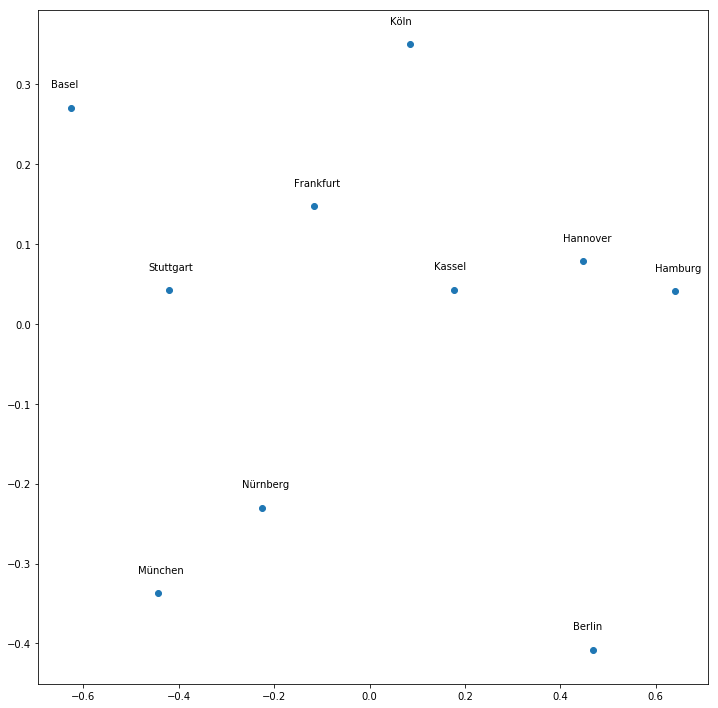

In [17]:
cities = ['Basel','Berlin','Frankfurt','Hamburg','Hannover','Kassel','Köln','München','Nürnberg','Stuttgart']
coords = newmds.embedding_

fig = plt.figure(figsize=(12,12))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()